<h1><center>Homework 5: Facial Recognition with Dimensionality Reduction</center></h1>

![Facial Recognition](https://static.businessinsider.com/image/504f8b2ceab8ea1c78000000/image.jpg)

## Introduction

A facial recognition system is a technology capable of identifying or verifying a person from a digital image or a video frame from a video source. There are multiple methods in which facial recognition systems work, but in general, they work by comparing selected facial features from given image with faces within a database. It is also described as a Biometric Artificial Intelligence based application that can uniquely identify a person by analysing patterns based on the person's facial textures and shape.

In this homework, we’re going to design a straightforward facial learning system with PCA and SVM.

## Dataset

The dataset is the "Labeled Faces in the Wild" (LFW) dataset from [UMass](http://vis-www.cs.umass.edu/lfw/). This dataset contains more than 13,000 images of faces collected from the web, each labeled with the name of the person pictured. 1,680 of the people pictured have two or more distinct photos in the data set. Some of the people pictured even have more than 60 distinct photos (those people are going to be studied in this particular homework).

## Classification Goal

Given a person's pixelated image, figure out the name of this person.

___

## Section I - Import Libraries and Load the Data

## Q1: 

#### Import necessary libraries. We will hold on to the sklearn libraries for now. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Run the following cell to import the `fetch_lfw_people()` function.

In [2]:
from sklearn.datasets import fetch_lfw_people

####  Call the `fetch_lfw_people()` function to download the LFW data into a dictionary named `faces`. 

To have a balanced dataset, we only want to include those people who have no less than 60 distinct photos. You can specify this by using the `min_faces_per_person` argument from the function. In addition, we will resize the original images to 40% in order to reduce your computation complexity - use argument `resize` for this purpose.

In [3]:
# This may take some time depending on your network speed.
faces = fetch_lfw_people(min_faces_per_person=60, resize=.4)




In [4]:
faces

{'data': array([[139.33333  , 133.33333  , 122.       , ...,   1.6666666,
           1.6666666,   0.6666667],
        [ 66.333336 ,  59.333332 ,  86.       , ..., 250.       ,
         244.33333  , 239.33333  ],
        [ 90.       ,  90.333336 ,  59.666668 , ..., 101.333336 ,
         151.66667  , 232.       ],
        ...,
        [ 29.       ,  29.       ,  43.666668 , ..., 145.       ,
         146.       , 143.33333  ],
        [ 50.333332 ,  65.666664 ,  88.       , ..., 197.       ,
         179.33333  , 166.33333  ],
        [ 30.       ,  27.       ,  32.666668 , ...,  35.       ,
          35.333332 ,  61.       ]], dtype=float32),
 'images': array([[[139.33333   , 133.33333   , 122.        , ...,  69.        ,
           68.666664  ,  67.666664  ],
         [146.        , 133.        , 118.        , ...,  67.333336  ,
           67.666664  ,  67.        ],
         [147.66667   , 133.        , 124.        , ...,  66.333336  ,
           68.666664  ,  67.        ],
         .

#### Study the keys from the `faces` dictionary and print out all the people's names from the dataset. Also print the dimension of the dataset in the format of:  
> `(number_of_images, image_height, image_width)`

In [5]:
faces['target']

array([1, 3, 3, ..., 7, 3, 5], dtype=int64)

In [6]:
print('All target names: ',faces['target_names'])
print('\n')
print('NumSamples * height * width: ',faces['images'].shape)

All target names:  ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


NumSamples * height * width:  (1348, 50, 37)


## Q2: Create a DataFrame

#### Firstly, create a DataFrame with only the raw image pixels, so that each row represents a single image, and each column represents a single pixel. 

In [7]:
# Create a DataFrame with all the image data
faces_df = pd.DataFrame(faces['data'])



# Display the dataframe
faces_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
0,139.333328,133.333328,122.000000,116.666664,120.666664,130.333328,137.666672,143.000000,150.000000,153.333328,...,67.666664,131.000000,111.000000,17.333334,3.666667,1.666667,0.333333,1.666667,1.666667,0.666667
1,66.333336,59.333332,86.000000,91.666664,78.333336,117.000000,124.000000,128.000000,136.333328,143.666672,...,56.333332,150.000000,226.333328,248.333328,253.000000,253.000000,253.333328,250.000000,244.333328,239.333328
2,90.000000,90.333336,59.666668,93.000000,119.333336,127.000000,129.000000,134.333328,135.666672,151.333328,...,78.333336,82.000000,83.666664,93.000000,110.333336,121.000000,118.000000,101.333336,151.666672,232.000000
3,71.000000,99.666664,132.000000,138.333328,141.333328,145.000000,157.333328,171.000000,174.666672,179.000000,...,93.333336,93.666664,90.333336,112.666664,192.666672,231.000000,229.333328,230.000000,226.333328,212.666672
4,57.000000,51.666668,45.000000,48.333332,42.666668,47.666668,60.666668,55.000000,55.333332,60.666668,...,45.333332,40.666668,41.000000,39.333332,35.666668,34.333332,34.333332,34.000000,35.333332,34.333332


#### Next, add a new `label` column to the DataFrame `faces_df` with the correct labels from the `faces` dictionary. 

In [8]:
# Now add the 'label' column to the DataFrame
faces_df['label'] = faces['target']



# Display the update DataFrame.
# Scroll all the way to the right to find the labels
faces_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1841,1842,1843,1844,1845,1846,1847,1848,1849,label
0,139.333328,133.333328,122.000000,116.666664,120.666664,130.333328,137.666672,143.000000,150.000000,153.333328,...,131.000000,111.000000,17.333334,3.666667,1.666667,0.333333,1.666667,1.666667,0.666667,1
1,66.333336,59.333332,86.000000,91.666664,78.333336,117.000000,124.000000,128.000000,136.333328,143.666672,...,150.000000,226.333328,248.333328,253.000000,253.000000,253.333328,250.000000,244.333328,239.333328,3
2,90.000000,90.333336,59.666668,93.000000,119.333336,127.000000,129.000000,134.333328,135.666672,151.333328,...,82.000000,83.666664,93.000000,110.333336,121.000000,118.000000,101.333336,151.666672,232.000000,3
3,71.000000,99.666664,132.000000,138.333328,141.333328,145.000000,157.333328,171.000000,174.666672,179.000000,...,93.666664,90.333336,112.666664,192.666672,231.000000,229.333328,230.000000,226.333328,212.666672,3
4,57.000000,51.666668,45.000000,48.333332,42.666668,47.666668,60.666668,55.000000,55.333332,60.666668,...,40.666668,41.000000,39.333332,35.666668,34.333332,34.333332,34.000000,35.333332,34.333332,5


#### Note that the new `label` column only has numeric indices, but does not tell you the person's name. Let's create a `name` column that contains the corresponding names. 

Hint: you may want to create a helper function 'toName' that takes the label as input, and map the label to the correct name.

In [9]:
def toName(lab):
    return faces['target_names'][lab] 
        

In [10]:
faces_df['name'] = faces_df['label'].apply(toName)

In [11]:
# Display the changes
# Scroll all the way to the right to find the names
faces_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1842,1843,1844,1845,1846,1847,1848,1849,label,name
0,139.333328,133.333328,122.000000,116.666664,120.666664,130.333328,137.666672,143.000000,150.000000,153.333328,...,111.000000,17.333334,3.666667,1.666667,0.333333,1.666667,1.666667,0.666667,1,Colin Powell
1,66.333336,59.333332,86.000000,91.666664,78.333336,117.000000,124.000000,128.000000,136.333328,143.666672,...,226.333328,248.333328,253.000000,253.000000,253.333328,250.000000,244.333328,239.333328,3,George W Bush
2,90.000000,90.333336,59.666668,93.000000,119.333336,127.000000,129.000000,134.333328,135.666672,151.333328,...,83.666664,93.000000,110.333336,121.000000,118.000000,101.333336,151.666672,232.000000,3,George W Bush
3,71.000000,99.666664,132.000000,138.333328,141.333328,145.000000,157.333328,171.000000,174.666672,179.000000,...,90.333336,112.666664,192.666672,231.000000,229.333328,230.000000,226.333328,212.666672,3,George W Bush
4,57.000000,51.666668,45.000000,48.333332,42.666668,47.666668,60.666668,55.000000,55.333332,60.666668,...,41.000000,39.333332,35.666668,34.333332,34.333332,34.000000,35.333332,34.333332,5,Hugo Chavez


## Section II - Exploratory Data Analysis

## Q3: 

#### Let's first visualize the number of images for each person.

<AxesSubplot:xlabel='name', ylabel='count'>

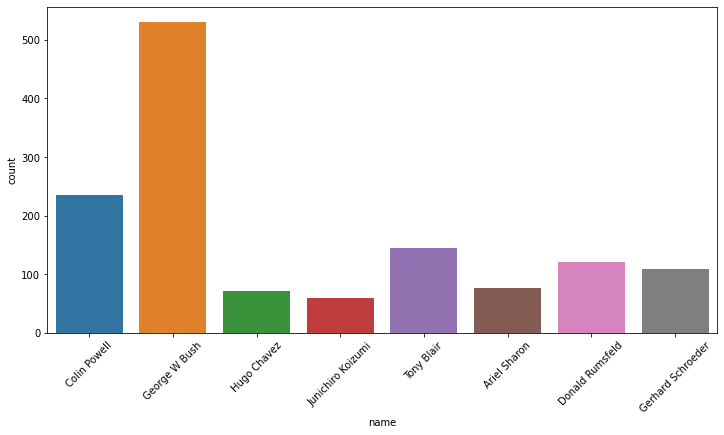

In [12]:
plt.figure(figsize=(12,6)) # Set the size of the figure
plt.xticks(rotation = 45)  # Rotate the x ticks by 45 degrees
sns.countplot(data=faces_df, x='name')





## Q4: 
#### Create a helper function `plot_faces()` with the given function prototype. We will be using this function to plot a grid of images for the questions later on. 

Hint: similar to homework 4, the **plt.imshow()** function takes in a **2D matrix** and plot a pixelated image with the matrix. Ensure to set the `cmap=plt.cm.gray`.

In [13]:
def plot_faces(lst_images, lst_names, row=3, col=4):
    """
    Function arguments:
        1. a list of 2D image matrices in Numpy array format; 
        2. the corresponding names for the array of images; 
        3. number of rows in the grid; 
        4. number of columns in the grid.

    Function returns:
        void. Only plots a grid of images.
    """
    fig, axs = plt.subplots(nrows= row, ncols=col, figsize = (3.0 * col, 4.0 * row))
    
    for i in range(row):
        for j in range(col):
            
            axs[i][j].set_xticks([]) ## Disable the x ticks
            axs[i][j].set_yticks([]) ## Disable the y ticks
            
            # TODO: Show image to the current axis
            #plt.subplot(row, col, (i+j)+1)
            axs[i][j].imshow(lst_images[i*col+j].reshape((50, 37)), cmap=plt.cm.gray)
            
            # TODO: Set title for the current axis
            axs[i][j].set_title(lst_names[i*col+j], size=12)
            
            


#### Validate the `plot_faces()` function by calling it to plot the first 12 faces from your dataset.

Hint: carefully choose the key from the `faces` dictionary to obtain a list of 2D matrices. The list of names can be obtained from your created DataFrame `faces_df`.

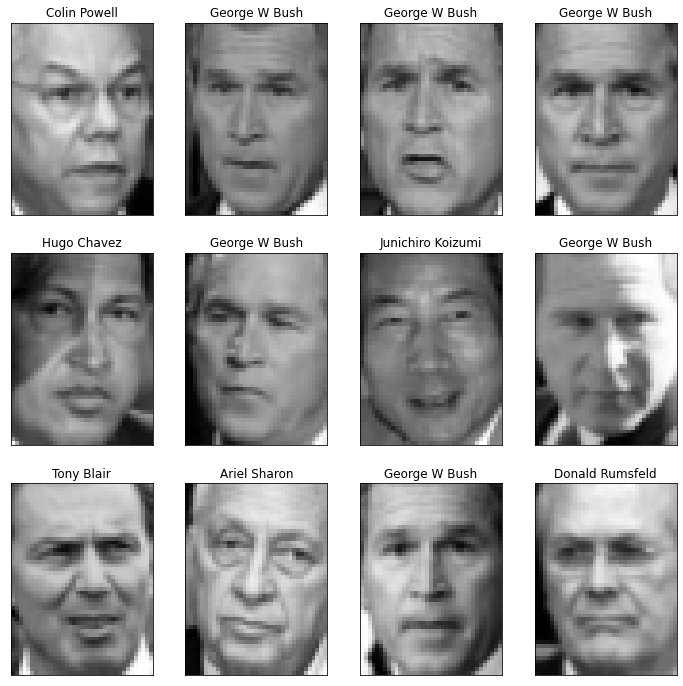

In [14]:
plot_faces(faces['images'], faces_df['name'])

## Section III - Data Preprocessing

## Q5: Feature Dimensionality Reduction

We need to reduce the number of features (pixels in this case) for 2 reasons. For one, the computation time will be reduced with fewer features. For two, reducing the data dimensionality also reduces the chances of model over-fitting. 

Here, instead of just dropping some random columns, we will apply the dimensionality reduction technique with **Principle Component Analysis (PCA)**. PCA works by attempting to represent the variance in the training data with as few dimensions as possible. So instead of dropping random features, PCA actually "compresses" the features with only minimal information losses. When using PCA on facial images, the obtained principal components are also called **eigenfaces**.

#### Prepare the X feature matrix and y label vector.

In [15]:
X = faces_df.drop(labels=['label', 'name'], axis=1)


y = faces_df['label']



#### Import PCA model from sklearn

In [16]:
# Import PCA 
from sklearn.decomposition import PCA

#### Create a PCA learner. Keep the two 150 principal components, set `whiten` to `True`, and choose `svd_solver` as `randomized`.

In [17]:
# Create the PCA instance 'pca'
pca = PCA(n_components=150, whiten=True, svd_solver='randomized')



#### Train the PCA model

In [18]:
# Fit your data into the pca model
pca.fit(X)



PCA(n_components=150, svd_solver='randomized', whiten=True)

#### Retrieve all principal components from the trained PCA model. This shows how we can map the original 1,850 pixels into 150 principal components. 

In [19]:
# Obtain all the fitted components from our pca model
# You can use a pca attribute named 'components_'
components = pca.components_



# 150 -- number of PCs
# 1850 -- number of original pixels
components.shape

(150, 1850)

#### Transform the X feature matrix with the trained PCA model to compress it. 

In [20]:
# Obtain the new features by calling the 'transform' function on 'pca'
X_pca = pca.transform(X)



In [21]:
# Notice the number of columns is reduced to 150!

X_pca.shape

(1348, 150)

## Q6: Visualize the Eigenfaces.

#### Firstly, reshape the `components` array from Q5 into a list of 2D matrices in the shape of `(number_of_components, image_height, image_width)`

In [22]:
# Now reshape the components array into a list of 2D matrices 
# so that we can visualize the eigenfaces later on with plot_faces() function.
eigenfaces = components.reshape((150, 50, 37))



#### Create a list of title names using list comprehension. Check the output for the format of the string. 

In [23]:
# Generate a list of strings for the name of each eigenface with list comprehension.
# E.g. ['eigenface 0', 'eigenface 1', ..., 'eigenface 149']
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]



eigenface_titles

['eigenface 0',
 'eigenface 1',
 'eigenface 2',
 'eigenface 3',
 'eigenface 4',
 'eigenface 5',
 'eigenface 6',
 'eigenface 7',
 'eigenface 8',
 'eigenface 9',
 'eigenface 10',
 'eigenface 11',
 'eigenface 12',
 'eigenface 13',
 'eigenface 14',
 'eigenface 15',
 'eigenface 16',
 'eigenface 17',
 'eigenface 18',
 'eigenface 19',
 'eigenface 20',
 'eigenface 21',
 'eigenface 22',
 'eigenface 23',
 'eigenface 24',
 'eigenface 25',
 'eigenface 26',
 'eigenface 27',
 'eigenface 28',
 'eigenface 29',
 'eigenface 30',
 'eigenface 31',
 'eigenface 32',
 'eigenface 33',
 'eigenface 34',
 'eigenface 35',
 'eigenface 36',
 'eigenface 37',
 'eigenface 38',
 'eigenface 39',
 'eigenface 40',
 'eigenface 41',
 'eigenface 42',
 'eigenface 43',
 'eigenface 44',
 'eigenface 45',
 'eigenface 46',
 'eigenface 47',
 'eigenface 48',
 'eigenface 49',
 'eigenface 50',
 'eigenface 51',
 'eigenface 52',
 'eigenface 53',
 'eigenface 54',
 'eigenface 55',
 'eigenface 56',
 'eigenface 57',
 'eigenface 58',
 'eigen

#### Let's re-use the `plot_faces()` function to visualize the top 36 eigenfaces in a `6x6` grid. 

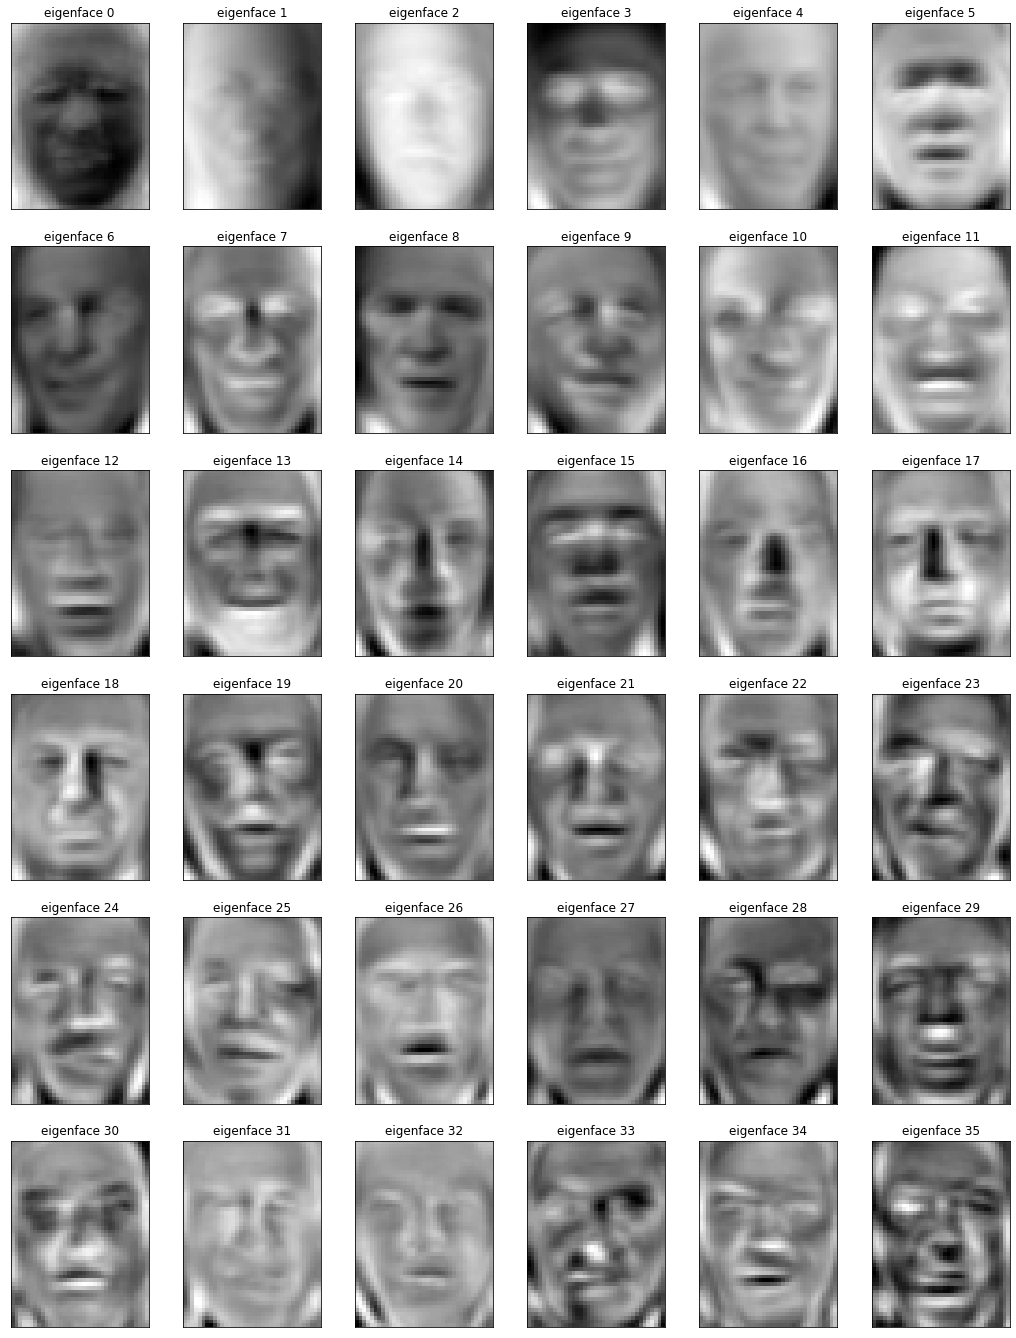

In [24]:
# Plot out the first 12 eigenfaces with their titles from the 150 total eigenfaces.
plot_faces(eigenfaces, eigenface_titles, 6, 6)

## Q7: Split the Data

#### Split the data into two parts: training (70%) and testing (30%). Use `random_state` as 101. 

In [25]:
# Import
from sklearn.model_selection import train_test_split

In [26]:
# split your dataframe into training and testing
X_train, X_test, y_train, y_test = train_test_split(
X_pca, y, test_size=0.30, random_state=101)



In [27]:
# Display the first record
X_train[:1]

array([[ 7.72335529e-02,  1.28534448e+00,  1.53338695e+00,
         1.53184116e+00,  3.59065711e-01,  4.24853712e-01,
        -4.10850048e-02, -4.23311800e-01, -9.46225286e-01,
         1.22458123e-01, -4.17409271e-01, -4.86787975e-01,
        -1.06434727e+00, -6.01193786e-01, -8.13200139e-03,
        -1.88385040e-01,  7.63783813e-01,  1.34701192e-01,
         9.78964746e-01,  6.07494950e-01,  6.94703102e-01,
        -1.49877846e-01,  7.44167447e-01, -6.70525953e-02,
         1.65713325e-01,  2.33754456e-01, -5.41794181e-01,
         9.39312279e-02, -5.77049665e-02,  2.30299056e-01,
        -3.67425345e-02,  3.62883538e-01,  2.82871425e-01,
         2.28750393e-01, -2.52387345e-01, -7.70487905e-01,
        -5.37510812e-01, -3.14350814e-01, -1.05023727e-01,
         4.59406286e-01,  6.81976378e-01, -6.13949060e-01,
         2.33867690e-01,  3.21290046e-01, -2.06955761e-01,
         3.46666694e-01, -3.84608746e-01, -8.67498636e-01,
         2.31875286e-01, -9.58498657e-01, -5.65782905e-0

## Section IV - Model Training and Evaluation

## Q8. Model Training.

Now it is time to train a model. We are going to use the SVM model as the classifier and use GridSearchCV to fine tune the hyperparameters. 

Parameter grid to be studied:
> `C = [1, 10, 100, 1000]`

> `gamma = [0.0001, 0.0005, 0.001, 0.005, 0.01]`

> `kernel = ['linear', 'rbf']`

#### Import libraries

In [28]:
# Import the functions needed
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#### Construct the parameter grid

In [29]:
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01], 'kernel': ['linear', 'rbf']} 

#### Create the grid search estimator. Ensure to turn on `refit` and set the verbose level to 3. 

In [30]:
grid = GridSearchCV(estimator=SVC(random_state=101),
                    param_grid=param_grid,
                    refit=True,
                    verbose=3)




#### Train the models with grid search. 

In [31]:
# Fit your training data to the grid of models
grid.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.778 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.762 total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.751 total time=   0.0s
[CV 4/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.729 total time=   0.0s
[CV 5/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.729 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.397 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.397 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.392 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.394 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.394 total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.0005, kernel=linear;, score=0.778 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.0005, kernel=linear

[CV 3/5] END C=100, gamma=0.0001, kernel=linear;, score=0.751 total time=   0.0s
[CV 4/5] END C=100, gamma=0.0001, kernel=linear;, score=0.729 total time=   0.0s
[CV 5/5] END C=100, gamma=0.0001, kernel=linear;, score=0.729 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.767 total time=   0.1s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.762 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.794 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.787 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.761 total time=   0.0s
[CV 1/5] END C=100, gamma=0.0005, kernel=linear;, score=0.778 total time=   0.0s
[CV 2/5] END C=100, gamma=0.0005, kernel=linear;, score=0.762 total time=   0.0s
[CV 3/5] END C=100, gamma=0.0005, kernel=linear;, score=0.751 total time=   0.0s
[CV 4/5] END C=100, gamma=0.0005, kernel=linear;, score=0.729 total time=   0.0s
[CV 5/5] END C=100, gamma=0.

GridSearchCV(estimator=SVC(random_state=101),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

#### Retrieve the best parameters

In [32]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

## Q9. Model Evaluation

#### Make predictions with the training set. 

In [33]:
predictions = grid.predict(X_test)

#### Generate a classification report and a confusion matrix to evaluate the model.

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 19   3   1   3   1   0   0   0]
 [  1  65   1   5   1   0   0   2]
 [  0   3  22   3   1   1   0   0]
 [  0  12   2 142   0   0   0   2]
 [  0   3   1   2  25   1   0   2]
 [  0   2   0   1   5  10   0   0]
 [  0   0   1   2   1   0  14   0]
 [  0   2   0   4   2   0   0  37]]
              precision    recall  f1-score   support

           0       0.95      0.70      0.81        27
           1       0.72      0.87      0.79        75
           2       0.79      0.73      0.76        30
           3       0.88      0.90      0.89       158
           4       0.69      0.74      0.71        34
           5       0.83      0.56      0.67        18
           6       1.00      0.78      0.88        18
           7       0.86      0.82      0.84        45

    accuracy                           0.82       405
   macro avg       0.84      0.76      0.79       405
weighted avg       0.83      0.82      0.82       405



## Section V: Create an Application with the Model

## Q10: Create a simple face recognition application by plotting the faces alongside their predicted names.

#### Plot the first 20 images in a `5 x 4` grid from the `testing` dataset. Print the predicted labels alongside the accurate labels for each image. You need to call the `plot_faces()` function for this question.

Hint: carefully craft the list of names so that it contains both the predictions and the accurate labels.

#### Firstly, retrieve the out-of-order indices from `y_test`.

In [36]:
image_indices = y_test.index



image_indices

Int64Index([ 569,  500,  834,  789, 1093,   81, 1222, 1097,  564,  162,
            ...
             759,  683,  271,  795, 1110, 1014,  955,  336,  143,  699],
           dtype='int64', length=405)

#### Use the retrieved indices to find the corresponding 2D images from the `faces` dictionary. 

In [37]:
# Create the 'list_of_images' argument for the plot_faces() function. 

list_of_images = faces['images'][image_indices]


#### Craft the list of names for all the images. The string should contain two parts: 1) the predicted names to the images; 2) the true names given by `y_test`. Use a newline character `\n` to separate these two parts into different lines. 

In [38]:
str(y_test.values[1])

'3'

In [39]:
lst_pred_names = []
for i in range(len(predictions)):
    lst_pred_names.append(toName(predictions[i]))

In [40]:
y_test

569     3
500     3
834     3
789     7
1093    0
       ..
1014    1
955     1
336     3
143     4
699     4
Name: label, Length: 405, dtype: int64

In [41]:
y_test.apply

<bound method Series.apply of 569     3
500     3
834     3
789     7
1093    0
       ..
1014    1
955     1
336     3
143     4
699     4
Name: label, Length: 405, dtype: int64>

In [42]:
 y_test = y_test.apply(toName)

In [43]:
y_test

569         George W Bush
500         George W Bush
834         George W Bush
789            Tony Blair
1093         Ariel Sharon
              ...        
1014         Colin Powell
955          Colin Powell
336         George W Bush
143     Gerhard Schroeder
699     Gerhard Schroeder
Name: label, Length: 405, dtype: object

In [44]:
lst_real_names = y_test.to_list()

In [45]:
# Create the 'list_of_names' argument for the plot_faces() function. 
list_of_names = []
for i in range(len(lst_real_names)):
    list_of_names.append('pre: ' + str(lst_pred_names[i])+ '\nacc: ' + str(lst_real_names[i]))
    
    


#### Plot the faces in a `5 x 4` grid. 

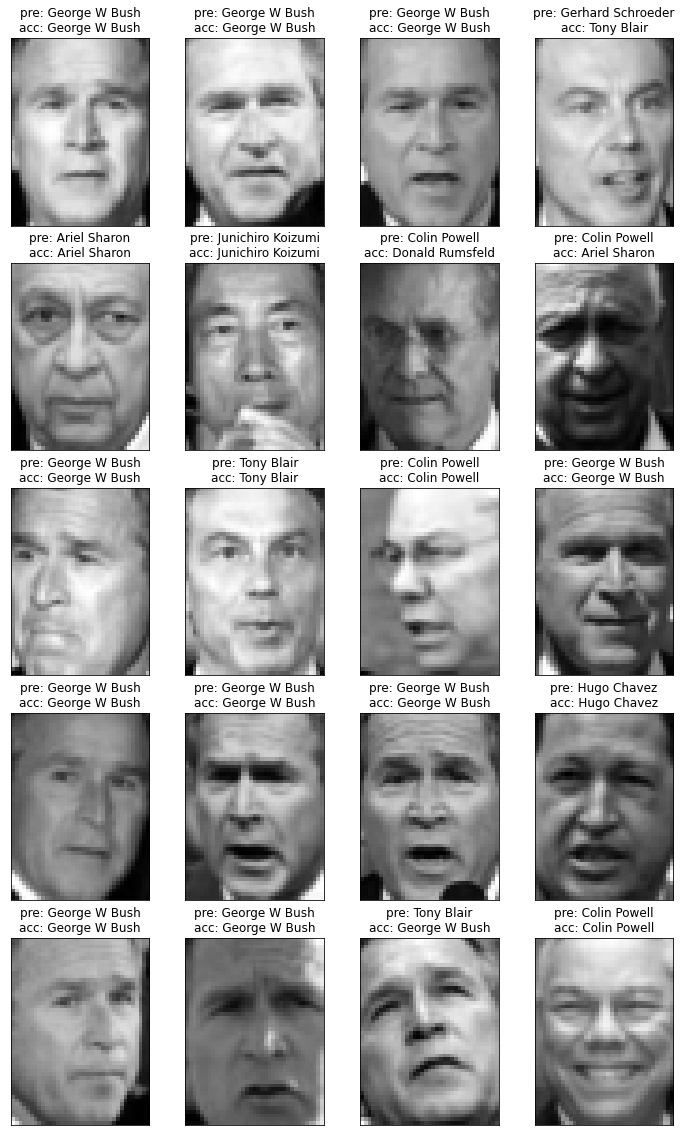

In [46]:
# Plot the faces out with the names as following
plot_faces(list_of_images, list_of_names, 5, 4)




## Good job!

The procedure you followed in this homework is also a good reference to your final project!